In [1]:
!pip install nilearn nibabel matplotlib pandas scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 85.1 MB/s eta 0:00:00


# **FFA:Fusiform Face area**:
A brain region preferred for faces located at the fusiform gyrus usually stronger on the right hemispshere but present in both.

During FFA Activity:

Faces : FFA response shoud be strong

Houses: FFA response should be weak

Tools/Objects: FFA response should be weak

# **PPA: Parahippocampal Place Area**
A brain region that prefers places and houses ie its a neraby brain area that becomes more active when we see houses places etc,its located in the parahippocampal cortex.

Houses/places : FFA response shoud be strong

Face: FFA response should be weak



# **Why?**
The brain does not process all visual objects the same way

It has specialized regions for different categories

      
ROI      Face     House

FFA       H         L

PPA       L         H

# **Loading Haxby Dataset**

In [2]:
from nilearn import datasets

haxby = datasets.fetch_haxby(subjects=[2])


[fetch_haxby] Added README.md to /root/nilearn_data

[fetch_haxby] Dataset created in /root/nilearn_data/haxby2001

[fetch_haxby] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 78397440 of 291168628 bytes (26.9%%,    2.7s remaining)

[fetch_haxby] Downloaded 166117376 of 291168628 bytes (57.1%%,    1.5s remaining)

[fetch_haxby] Downloaded 254353408 of 291168628 bytes (87.4%%,    0.4s remaining)

[fetch_haxby]  ...done. (4 seconds, 0 min)

[fetch_haxby] Extracting data from 
/root/nilearn_data/haxby2001/9cabe068089e791ef0c5fe930fc20e30/subj2-2010.01.14.tar.gz...

[fetch_haxby] .. done.

# **Loading labels,ROI masks**

In [3]:
import nibabel as nib
import pandas as pd

fmri_img = nib.load(haxby.func[0])
fmri_data = fmri_img.get_fdata()

labels_df = pd.read_csv(haxby.session_target[0], sep=' ')
labels = labels_df['labels'].values

# ROI masks
mask_face_img = nib.load(haxby.mask_face[0])   # FFA
mask_house_img = nib.load(haxby.mask_house[0]) # PPA

mask_face_data = mask_face_img.get_fdata().astype(bool)
mask_house_data = mask_house_img.get_fdata().astype(bool)
print(mask_face_data)
print(mask_house_data)

print("fMRI shape:", fmri_data.shape)
print("FFA voxels:", mask_face_data.sum())
print("PPA voxels:", mask_house_data.sum())


[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

FFA region is comparatively small than PPA and therfore less voxels than PPA

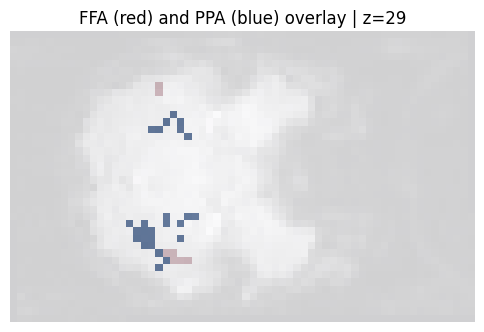

In [4]:
import matplotlib.pyplot as plt

slice_z = 29

plt.figure(figsize=(6,6))

# base fMRI slice
plt.imshow(fmri_data[:, :, slice_z, 0], cmap='gray')

# FFA overlay
plt.imshow(mask_face_data[:, :, slice_z],
           cmap='Reds', alpha=0.6)

# PPA overlay
plt.imshow(mask_house_data[:, :, slice_z],
           cmap='Blues', alpha=0.6)

plt.title(f"FFA (red) and PPA (blue) overlay | z={slice_z}")
plt.axis('off')
plt.show()


From the figure the Blue color represents the house face mask and the light red color represents the face mask ie ffa region

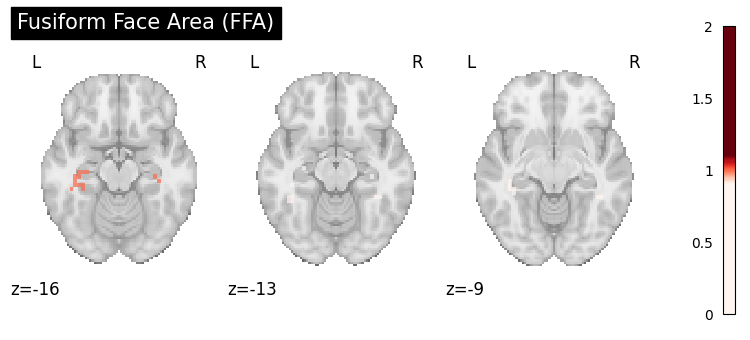

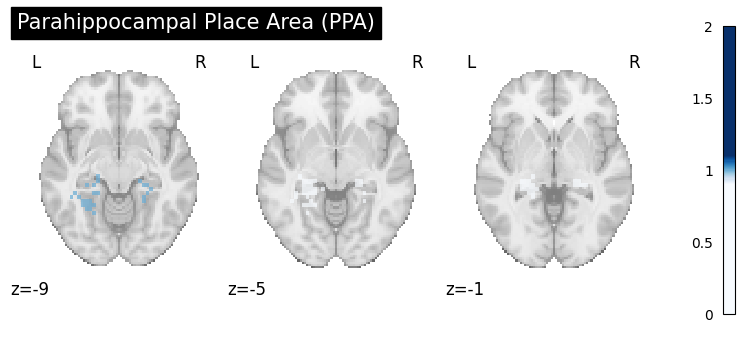

In [5]:
from nilearn import plotting

plotting.plot_roi(
    mask_face_img,
    title="Fusiform Face Area (FFA)",
    display_mode='z',
    cut_coords=3,
    cmap='Reds'
)

plotting.plot_roi(
    mask_house_img,
    title="Parahippocampal Place Area (PPA)",
    display_mode='z',
    cut_coords=3,
    cmap='Blues'
)


The fMRI data is 4D with 1452 time points.
I used expert-defined ROI masks from the Haxby dataset.
FFA has 30 voxels and PPA has 118 voxels because these regions are small and highly selective.
Using only these voxels reduces noise and strengthens category-specific signals.
I also visualized the masks to confirm their anatomical locations.

THe z value that we see here  are defibed in different coordinate system, the ffa and ppa mask comes from standrad brain atlases (MNI spaces),these atlases uses coordinates where z=0 means center of the brain,negatives alice lower brain

Create FACE and HOUSE time masks

In [6]:
import numpy as np

face_mask = labels == 'face'
house_mask = labels == 'house'

print("FACE TRs:", face_mask.sum())
print("HOUSE TRs:", house_mask.sum())


FACE TRs: 108
HOUSE TRs: 108


# **Extract MEan BOLD signal fromm ffa and ppa**

In [7]:
xs_f, ys_f, zs_f = np.where(mask_face_data)
xs_h, ys_h, zs_h = np.where(mask_house_data)

T = fmri_data.shape[-1]

ffa_signal = np.zeros(T)
ppa_signal = np.zeros(T)

for t in range(T):
    ffa_signal[t] = fmri_data[xs_f, ys_f, zs_f, t].mean()
    ppa_signal[t] = fmri_data[xs_h, ys_h, zs_h, t].mean()


From the whole brain, keep only FFA or PPA voxels, and track how their signal changes over time.

In [8]:
from scipy.stats import zscore

ffa_z = zscore(ffa_signal)
ppa_z = zscore(ppa_signal)




Z-score means:

“How high or low is the signal compared to its own average?”

After z-scoring:

0 → average activity

+1 → higher than usual

-1 → lower than usual

# **Plot FFA Activity**

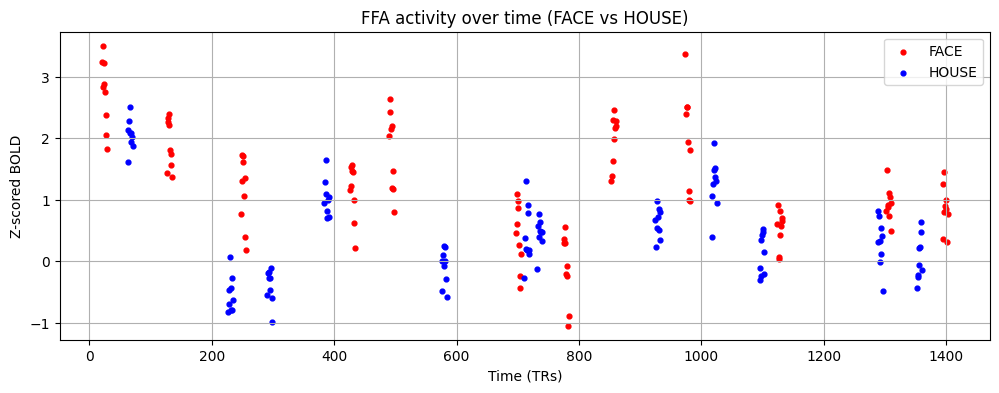

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
#plt.plot(ffa_z, color='black', label='FFA mean BOLD')

plt.scatter(np.where(face_mask)[0], ffa_z[face_mask],
            color='red', s=12, label='FACE')

plt.scatter(np.where(house_mask)[0], ffa_z[house_mask],
            color='blue', s=12, label='HOUSE')

plt.title("FFA activity over time (FACE vs HOUSE)")
plt.xlabel("Time (TRs)")
plt.ylabel("Z-scored BOLD")
plt.legend()
plt.grid(True)
plt.show()


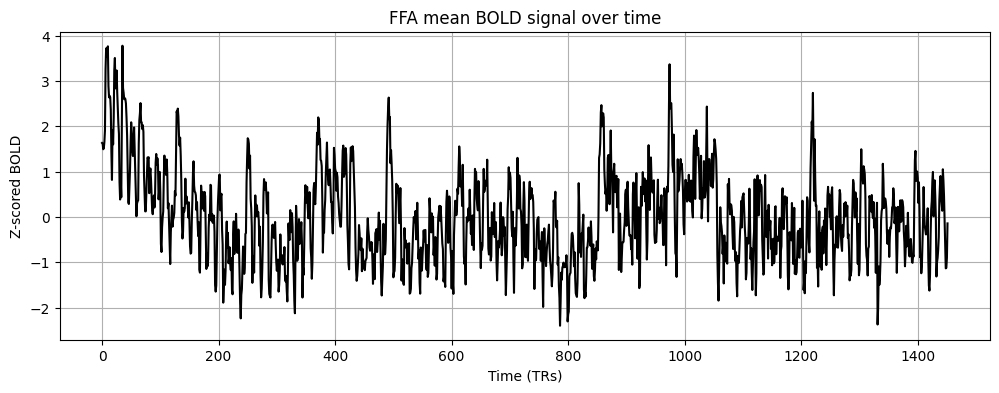

In [10]:
plt.figure(figsize=(12,4))
plt.plot(ffa_z, color='black')
plt.xlabel("Time (TRs)")
plt.ylabel("Z-scored BOLD")
plt.title("FFA mean BOLD signal over time")
plt.grid(True)
plt.show()


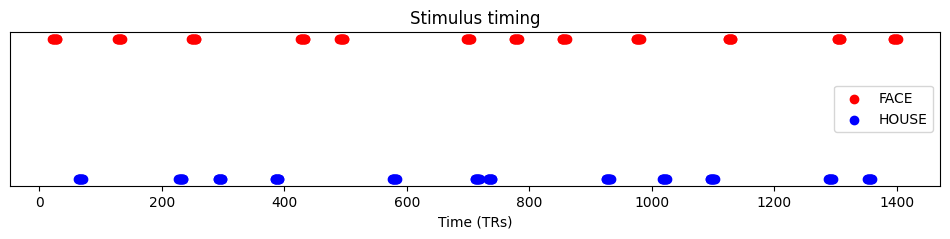

In [11]:
plt.figure(figsize=(12,2))
plt.scatter(np.where(face_mask)[0], np.ones(face_mask.sum()), color='red', label='FACE')
plt.scatter(np.where(house_mask)[0], np.zeros(house_mask.sum()), color='blue', label='HOUSE')
plt.yticks([])
plt.xlabel("Time (TRs)")
plt.title("Stimulus timing")
plt.legend()
plt.show()

Red dots (FACE) higher than blue (HOUSE)

# **Plot PPA ACtivity**

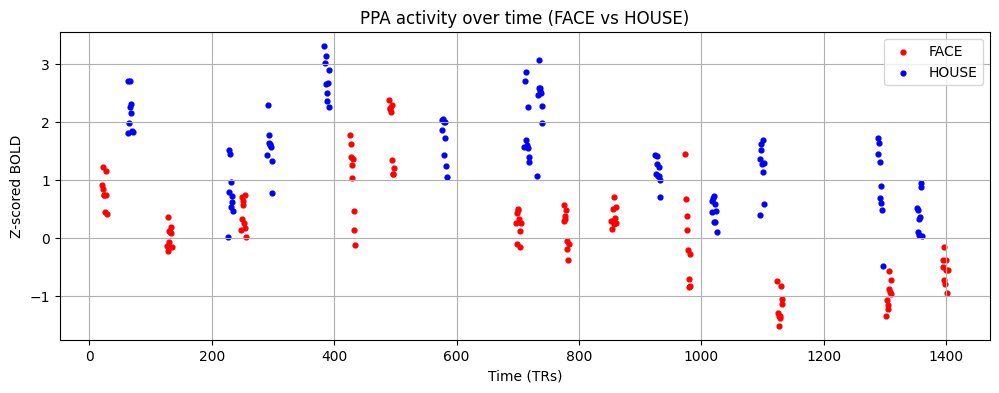

In [12]:
plt.figure(figsize=(12,4))
#plt.plot(ppa_z, color='black', label='PPA mean BOLD')

plt.scatter(np.where(face_mask)[0], ppa_z[face_mask],
            color='red', s=12, label='FACE')

plt.scatter(np.where(house_mask)[0], ppa_z[house_mask],
            color='blue', s=12, label='HOUSE')

plt.title("PPA activity over time (FACE vs HOUSE)")
plt.xlabel("Time (TRs)")
plt.ylabel("Z-scored BOLD")
plt.legend()
plt.grid(True)
plt.show()


Blue dots (HOUSE) higher than red (FACE

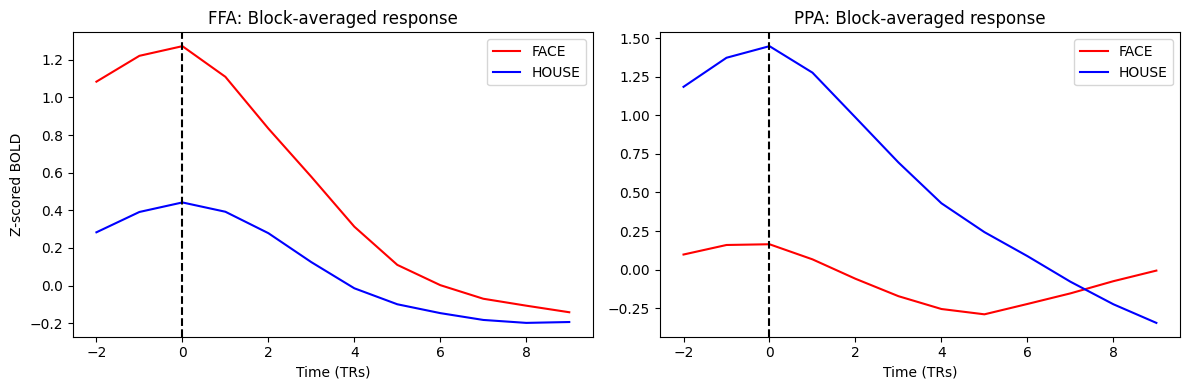

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
block_len = 9   # number of TRs per block (Haxby)
pre = 2         # TRs before block
post = 10       # TRs after block

def block_average(signal, mask):
    segments = []
    idx = np.where(mask)[0]
    for i in idx:
        if i-pre >= 0 and i+post < len(signal):
            segments.append(signal[i-pre:i+post])
    return np.mean(segments, axis=0)

# FFA
ffa_face_avg = block_average(ffa_z, face_mask)
ffa_house_avg = block_average(ffa_z, house_mask)

# PPA
ppa_face_avg = block_average(ppa_z, face_mask)
ppa_house_avg = block_average(ppa_z, house_mask)

time = np.arange(-pre, post)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(time, ffa_face_avg, label='FACE', color='red')
plt.plot(time, ffa_house_avg, label='HOUSE', color='blue')
plt.axvline(0, color='k', linestyle='--')
plt.title("FFA: Block-averaged response")
plt.xlabel("Time (TRs)")
plt.ylabel("Z-scored BOLD")
plt.legend()

plt.subplot(1,2,2)
plt.plot(time, ppa_face_avg, label='FACE', color='red')
plt.plot(time, ppa_house_avg, label='HOUSE', color='blue')
plt.axvline(0, color='k', linestyle='--')
plt.title("PPA: Block-averaged response")
plt.xlabel("Time (TRs)")
plt.legend()

plt.tight_layout()
plt.show()


Instead of raw time-series, I aligned FACE and HOUSE blocks and averaged across them.
This reveals the true task-related response and removes noise.
In FFA, FACE responses are stronger; in PPA, HOUSE responses are stronger

/tmp/ipython-input-654461002.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
/tmp/ipython-input-654461002.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


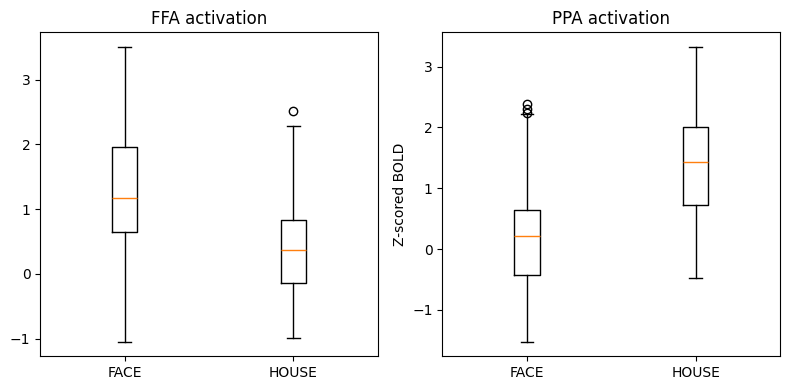

In [14]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.boxplot(
    [ffa_z[face_mask], ffa_z[house_mask]],
    labels=['FACE', 'HOUSE']
)
plt.title("FFA activation")

plt.subplot(1,2,2)
plt.boxplot(
    [ppa_z[face_mask], ppa_z[house_mask]],
    labels=['FACE', 'HOUSE']
)
plt.title("PPA activation")

plt.ylabel("Z-scored BOLD")
plt.tight_layout()
plt.show()


# **Statistical conparison**

This shows the distribution of activation values.
In FFA, the FACE distribution is higher than HOUSE.
In PPA, HOUSE is higher than FACE

In [15]:
print("FFA mean:")
print(" FACE :", ffa_z[face_mask].mean())
print(" HOUSE:", ffa_z[house_mask].mean())

print("\nPPA mean:")
print(" FACE :", ppa_z[face_mask].mean())
print(" HOUSE:", ppa_z[house_mask].mean())


FFA mean:
 FACE : 1.2728520113456998
 HOUSE: 0.4417822345202958

PPA mean:
 FACE : 0.16441284348061075
 HOUSE: 1.44731220899385


ffa_z → average FFA BOLD signal over time (z-scored)

ppa_z → average PPA BOLD signal over time (z-scored)

You also already have:

face_mask → time points where FACE is shown

house_mask → time points where HOUSE is shown

So now you ask:

“During FACE times, what is the average FFA signal?”
“During HOUSE times, what is the average PPA signal?”

# **Bar plot**

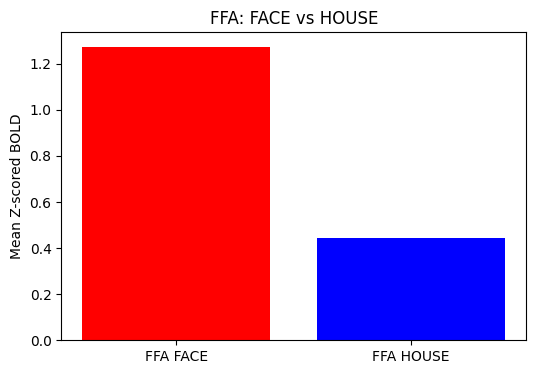

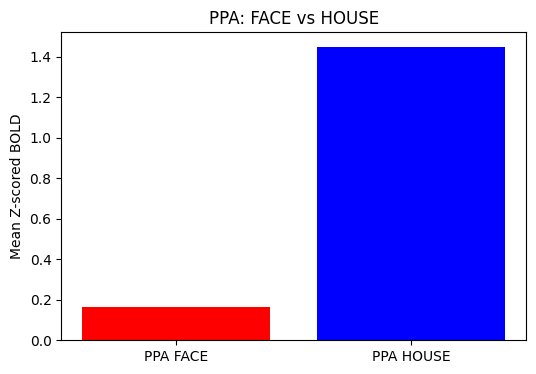

In [16]:
plt.figure(figsize=(6,4))

plt.bar(['FFA FACE','FFA HOUSE'],
        [ffa_z[face_mask].mean(), ffa_z[house_mask].mean()],
        color=['red','blue'])

plt.title("FFA: FACE vs HOUSE")
plt.ylabel("Mean Z-scored BOLD")
plt.show()


plt.figure(figsize=(6,4))

plt.bar(['PPA FACE','PPA HOUSE'],
        [ppa_z[face_mask].mean(), ppa_z[house_mask].mean()],
        color=['red','blue'])

plt.title("PPA: FACE vs HOUSE")
plt.ylabel("Mean Z-scored BOLD")
plt.show()


Using ROI-based analysis, I showed a double dissociation: FFA responds more to faces, and PPA responds more to houses, both visually and quantitatively

Because FFA and PPA respond differently to faces and houses, these signals can be used as features for classification.

Because avergaing usualy introduces noise ie face,houserest,noise

GLM uses stimulus timing ,it basically answers how does the voxel activity match the expected response to FACE or hOUSE blocks.GLM basically gives activation strengths not raw signal

GLM

In [17]:
import pandas as pd
import numpy as np

# Make sure labels_df has 'labels'
labels_df.head()
TR = 2.5  # seconds (Haxby dataset)



In [18]:
events = pd.DataFrame({
    'onset': labels_df.index.values * TR,   # time in seconds
    'duration': TR,                          # each label lasts 1 TR
    'trial_type': labels_df['labels']
})

events.head(10)


,onset,duration,trial_type
0,0.0,2.5,rest
1,2.5,2.5,rest
2,5.0,2.5,rest
3,7.5,2.5,rest
4,10.0,2.5,rest
5,12.5,2.5,rest
6,15.0,2.5,scissors
7,17.5,2.5,scissors
8,20.0,2.5,scissors
9,22.5,2.5,scissors


In [19]:
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np

n_scans = fmri_img.shape[-1]
frame_times = np.arange(n_scans) * TR

design_matrix = make_first_level_design_matrix(
    frame_times,
    events,
    hrf_model='spm',
    drift_model='cosine',
    high_pass=0.01
)

design_matrix.head(10)


,bottle,cat,chair,face,house,rest,scissors,scrambledpix,shoe,drift_1,...,drift_64,drift_65,drift_66,drift_67,drift_68,drift_69,drift_70,drift_71,drift_72,constant
0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.037113,...,0.037025,0.037022,0.037019,0.037016,0.037013,0.037010,0.037007,0.037004,0.037001,1.0
2.5,0.0,0.0,0.0,0.0,0.0,0.048760,0.000000,0.0,0.0,0.037113,...,0.036316,0.036291,0.036265,0.036240,0.036213,0.036187,0.036160,0.036133,0.036105,1.0
5.0,0.0,0.0,0.0,0.0,0.0,0.457347,0.000000,0.0,0.0,0.037113,...,0.034912,0.034843,0.034773,0.034703,0.034631,0.034558,0.034485,0.034410,0.034334,1.0
7.5,0.0,0.0,0.0,0.0,0.0,0.907874,0.000000,0.0,0.0,0.037112,...,0.032839,0.032707,0.032574,0.032438,0.032301,0.032161,0.032020,0.031877,0.031732,1.0
10.0,0.0,0.0,0.0,0.0,0.0,1.109668,0.000000,0.0,0.0,0.037112,...,0.030138,0.029926,0.029711,0.029493,0.029272,0.029049,0.028822,0.028593,0.028362,1.0
12.5,0.0,0.0,0.0,0.0,0.0,1.143672,0.000000,0.0,0.0,0.037111,...,0.026860,0.026554,0.026243,0.025929,0.025611,0.025290,0.024965,0.024636,0.024304,1.0
15.0,0.0,0.0,0.0,0.0,0.0,1.110417,0.000000,0.0,0.0,0.037110,...,0.023068,0.022657,0.022241,0.021821,0.021397,0.020968,0.020536,0.020099,0.019658,1.0
17.5,0.0,0.0,0.0,0.0,0.0,1.016160,0.048760,0.0,0.0,0.037109,...,0.018834,0.018313,0.017787,0.017256,0.016720,0.016180,0.015636,0.015088,0.014536,1.0
20.0,0.0,0.0,0.0,0.0,0.0,0.573740,0.457347,0.0,0.0,0.037107,...,0.014240,0.013607,0.012970,0.012328,0.011682,0.011033,0.010379,0.009722,0.009062,1.0
22.5,0.0,0.0,0.0,0.0,0.0,0.104639,0.907874,0.0,0.0,0.037106,...,0.009373,0.008633,0.007889,0.007142,0.006392,0.005639,0.004884,0.004127,0.003368,1.0


In [20]:
from nilearn.glm.first_level import FirstLevelModel

glm = FirstLevelModel(
    t_r=TR,
    hrf_model='spm',
    noise_model='ar1',
    standardize=True,
    minimize_memory=False
)

glm = glm.fit(fmri_img, design_matrices=design_matrix)


/tmp/ipython-input-2593791141.py:11: UserWarning: If design matrices are supplied, [hrf_model, t_r] will be ignored.
  glm = glm.fit(fmri_img, design_matrices=design_matrix)


Compute GLM contrasts

FACE>HOUSE

In [21]:
face_gt_house = glm.compute_contrast(
    'face - house',
    output_type='z_score'
)

HOUSE>FACE

In [22]:
house_gt_face = glm.compute_contrast(
    'house - face',
    output_type='z_score'
)


# **Restrict contrasts to FFA & PPA**

In [23]:
import numpy as np

z_face_house = face_gt_house.get_fdata()
z_house_face = house_gt_face.get_fdata()



ffa_face_vals = z_face_house[mask_face_data]
ppa_house_vals = z_house_face[mask_house_data]

print("FACE > HOUSE in FFA:", ffa_face_vals.mean())
print("HOUSE > FACE in PPA:", ppa_house_vals.mean())



FACE > HOUSE in FFA: 0.7731373141563846
HOUSE > FACE in PPA: 2.5037258345181024


I built a GLM using face and house events, modeled with HRF.
Then I computed FACE > HOUSE and HOUSE > FACE contrasts.
When restricting the analysis to category-selective ROIs, I observed that FFA shows stronger responses for faces, while PPA shows stronger responses for houses.
This confirms category-specific neural selectivity

FACE > HOUSE (whole brain, GLM)

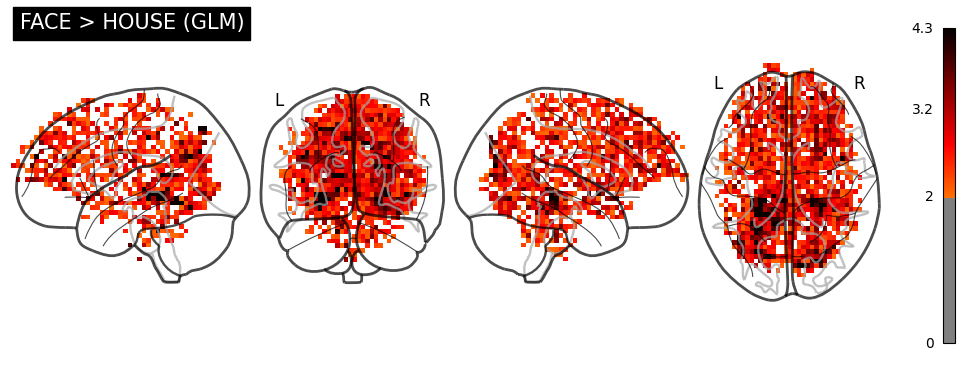

In [24]:
from nilearn import plotting

plotting.plot_glass_brain(
    face_gt_house,
    threshold=2.0,
    colorbar=True,
    title='FACE > HOUSE (GLM)',
    display_mode='lyrz'
)


HOUSE > FACE (whole brain, GLM)

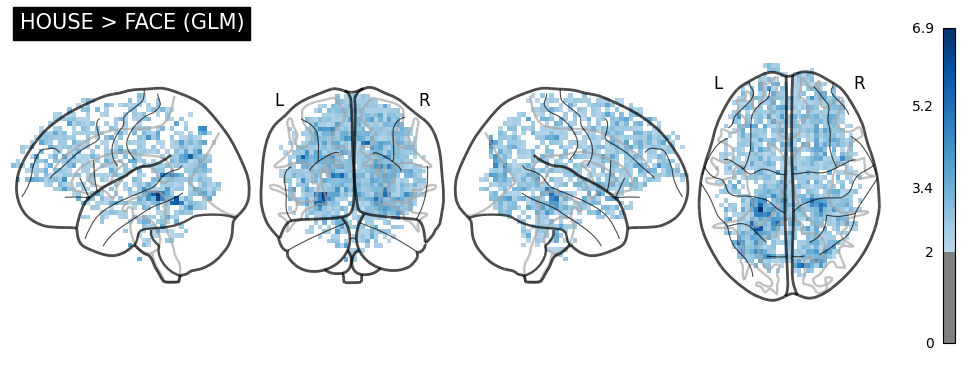

In [25]:
plotting.plot_glass_brain(
    house_gt_face,
    threshold=2.0,
    colorbar=True,
    title='HOUSE > FACE (GLM)',
    cmap='Blues',
    display_mode='lyrz'

)


FACE > HOUSE in FFA


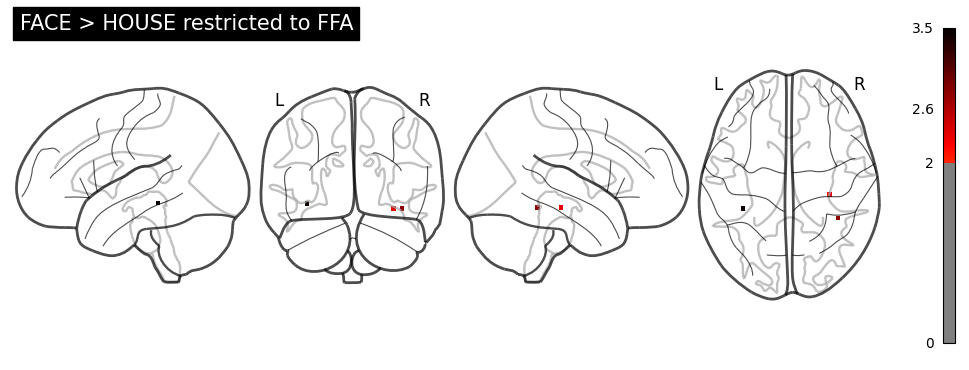

In [26]:
import nibabel as nib
import numpy as np

z_fh = face_gt_house.get_fdata()
z_fh_ffa = np.zeros_like(z_fh)
z_fh_ffa[mask_face_data] = z_fh[mask_face_data]

z_fh_ffa_img = nib.Nifti1Image(z_fh_ffa, fmri_img.affine)

plotting.plot_glass_brain(
    z_fh_ffa_img,
    threshold=2.0,
    colorbar=True,
    title='FACE > HOUSE restricted to FFA',
    display_mode='lyrz'
)


HOUSE > FACE in PPA only

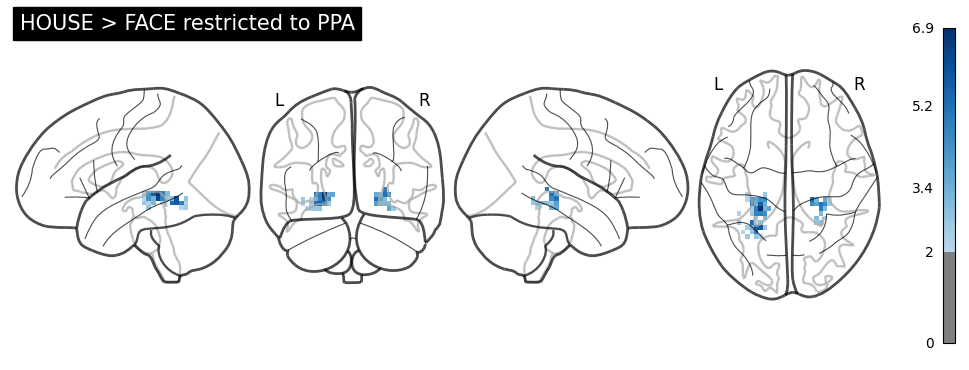

In [27]:
z_hf = house_gt_face.get_fdata()
z_hf_ppa = np.zeros_like(z_hf)
z_hf_ppa[mask_house_data] = z_hf[mask_house_data]

z_hf_ppa_img = nib.Nifti1Image(z_hf_ppa, fmri_img.affine)

plotting.plot_glass_brain(
    z_hf_ppa_img,
    threshold=2.0,
    colorbar=True,
    title='HOUSE > FACE restricted to PPA',
    cmap='Blues',
    display_mode='lyrz'
)


After extracting ROI signals, I used GLM to compute FACE > HOUSE and HOUSE > FACE contrasts.
Quantitatively, FACE > HOUSE is stronger in FFA, while HOUSE > FACE is much stronger in PPA.
Glass brain visualizations show that these effects are spatially localized to known category-selective regions, confirming fusiform face area and parahippocampal place area selectivity

First, I ran a GLM to compare FACE vs HOUSE.
At the whole-brain level, both contrasts showed widespread activation, which is hard to interpret.
So I restricted the analysis to category-selective ROIs.

In the Fusiform Face Area, FACE showed stronger activation than HOUSE.
In the Parahippocampal Place Area, HOUSE showed stronger activation than FACE.

# **Improved color coding for GLM**

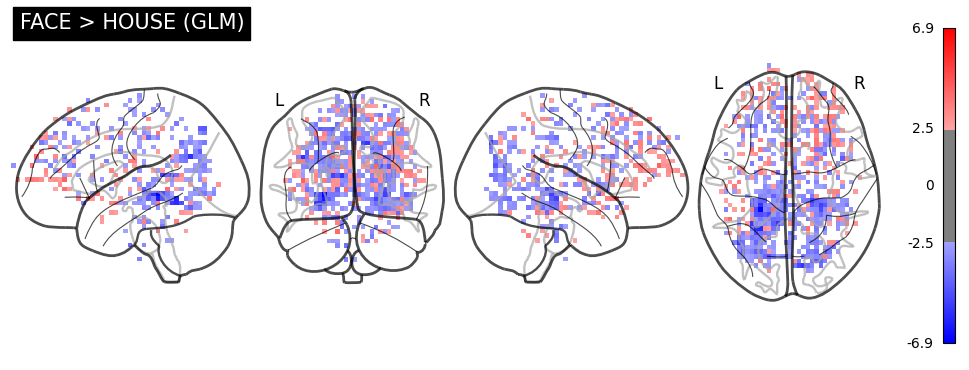

In [28]:
from nilearn import plotting

plotting.plot_glass_brain(
    face_gt_house,
    threshold=2.5,
    colorbar=True,
    cmap='bwr',
    display_mode='lyrz',
    title='FACE > HOUSE (GLM)',
    plot_abs=False
)


From the colorbar:

+6.9 → very strong FACE preference

0 → no difference

-6.9 → very strong HOUSE preference

This is a Z-score scale:

Larger magnitude = stronger statistical evidence

This glass brain shows the bidirectional GLM contrast FACE minus HOUSE. Red voxels indicate regions where faces evoke stronger activation, while blue voxels indicate regions where houses evoke stronger activation. The map shows distributed but distinct category-selective patterns across visual cortex.

🔴 Red = likes faces more

🔵 Blue = likes houses more

Darker color = stronger preference